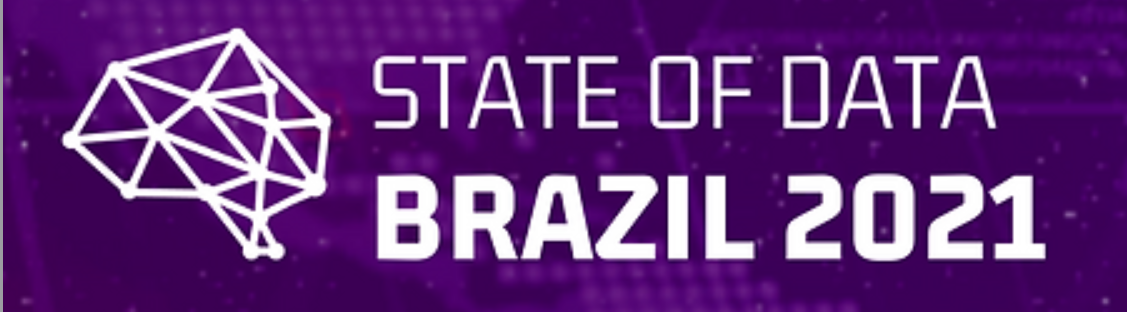

In [1]:
from IPython.display import Image
Image("logo.png")

A State of Data Brazil foi realizada entre 18 de outubro de 2021 e 6 de dezembro de 2021 através de um questionário online e reuniu indicadores relacionados a **perfil demográfico, formação, atuação no setor, remuneração, rotatividade e fatores de satisfação no ambiente de trabalho,** incluindo o impacto do trabalho remoto nas preferências profissionais de 2.645 respondentes de todo o Brasil. A amostra reflete a visão de variados papéis de atuação em empresas, como os de analista de dados, cientista de dados e engenheiro de dados, bem como diferentes perfis de experiência profissional, incluindo analistas júnior, pleno, sênior e gestores.

Há uma grande quantidade de colunas e elas são divididas em 10 categorias, de P0 a P9. Cada categoria é relacionada com um tipo de análise diferente.

- **P0: Id de cada usuário que respondeu ao questionário.**
- **P1: Perguntas pessoais e demográficas: Idade, Estado, Genero, ... df_1**
- **P2: Perguntas relacionadas ao emprego atual: Salario, Cargo, Nível, ... df_2**
- **P3: Perguntas mais específicas sobre o emprego atual: Nível da equipe, ... df_3**
- **P4: Perguntas sobre como é a analise de dados na empresa, que tipo de dado é utilizado. df_4**
- **P5: Perguntas sobre novas oportunidades (Apenas 3 perguntas) df_5**
- **P6: Perguntas sobre rotina de trabalho relacionada a Engenharia de Dados e ferramentas utilizadas df_6**
- **P7: Perguntas sobre rotina de trabalho relacionada a Análise de Dados e ferramentas utilizadas df_7**
- **P8: Perguntas sobre rotina de trabalho relacionada a Ciencia de Dados e ferramentas utilizadas df_8**
- **P9: Perguntas sobre interação com Data Hackers df_9**

*Vamos entender cada uma das categorias e obter informações relevantes sobre o estudo.*

# P1: Questões Pessoais e Demográficas

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('State of Data.csv')

df_1 = data.loc[:,"('P1_a ', 'Idade')":"('P1_i ', 'Área de Formação')"]
df_1.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_2 = data.loc[:,"('P2_a ', 'Qual sua situação atual de trabalho?')":"('P2_s ', 'Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?')"]
df_2.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_3 = data.loc[:,"('P3_a ', 'Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?')":"('P3_d_n ', 'Dividir o tempo entre entregas técnicas e gestão.')"]
df_3.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_4 = data.loc[:,"('P4_a_a ', 'Mesmo que esse não seja seu cargo formal, você considera que sua atuação no dia a dia, reflete alguma das opções listadas abaixo?')":"('P4_h_x ', 'Não utilizo nenhuma ferramenta de BI no trabalho')"]
df_4.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_5 = data.loc[:,"('P5_b ', 'Qual oportunidade você está buscando?')":"('P5_d ', 'Como tem sido a busca por um emprego na área de dados?')"]
df_5.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_6 = data.loc[:,"('P6_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?')":"('P6_h_h ', 'Cuidando da qualidade dos dados, metadados e dicionário de dados.')"]
df_6.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_7 = data.loc[:,"('P7_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?')":"('P7_d_h ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')"]
df_7.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_8 = data.loc[:,"('P8_a ', 'Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?')":"('P8_d_i ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"]
df_8.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

df_9 = data.loc[:,"('P9_a ', 'Quais das iniciativas do Data Hackers que você já acessou/acompanhou?')":"('P9_a_g ', 'Ainda não conhecia o Data Hackers')"]
df_9.insert(loc=0, column="('P0', 'id')", value=data["('P0', 'id')"])

In [3]:
# data = pd.read_csv('../input/statedata/State of Data.csv')
# !pip install geobr --quiet

**Gráfico que ilustra a distribuição de idades dentre as pessoas que responderam a pesquisa, percebemos uma maior quantidade entre 25 e 35 anos.**

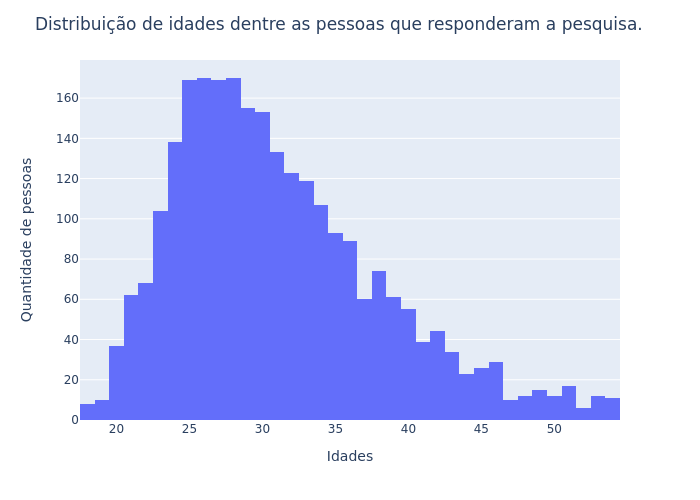

In [3]:
import plotly.express as px

fig = px.histogram(df_1, x="('P1_a ', 'Idade')").update_layout(
    title='Distribuição de idades dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Idades', 
    yaxis_title='Quantidade de pessoas'
)

fig.show("png")

**Gráfico que ilustra a distribuição de gêneros dentre as pessoas que responderam a pesquisa, percebemos uma prevalência masculina.**

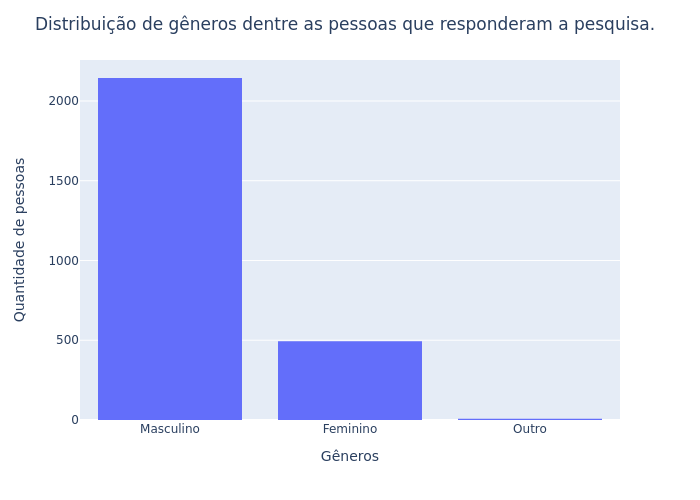

In [4]:
fig = px.histogram(df_1, x="('P1_b ', 'Genero')").update_layout(
    title='Distribuição de gêneros dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Gêneros', 
    yaxis_title='Quantidade de pessoas'
)

fig.show("png")

**Mapa para ilustração de informações geográficas. Números relevantes apenas nos estados das regiões Sul e Sudeste e com muito mais enfâse no estado de São Paulo.**

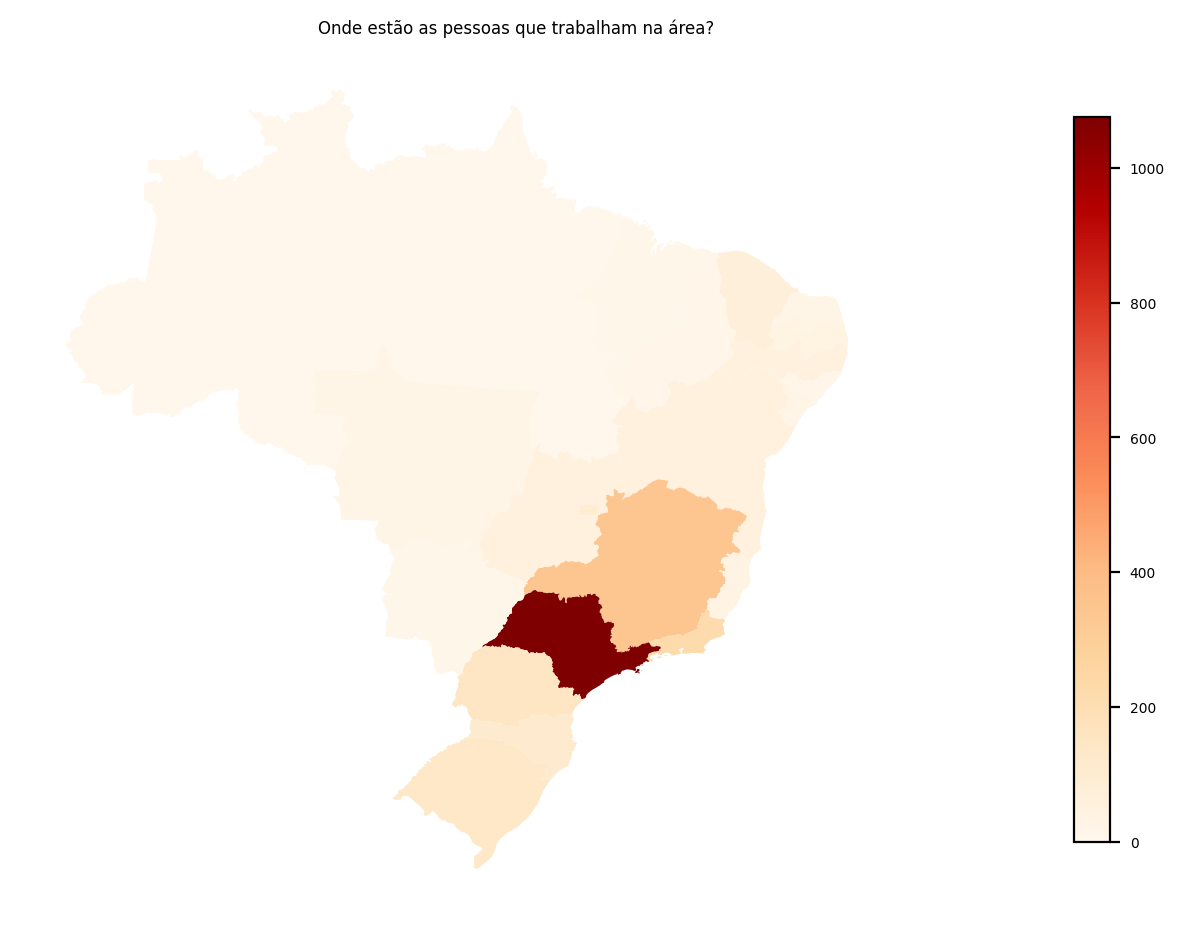

In [6]:
import geobr 

count_states = df_1.groupby(by=["('P1_e_a ', 'uf onde mora')"]).count().reset_index()
states = geobr.read_state(year=2019, simplified=True)
states = states.merge(count_states, how="left", left_on="abbrev_state", right_on="('P1_e_a ', 'uf onde mora')")
states["('P0', 'id')"] = states["('P0', 'id')"].fillna(0)

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(8, 8), dpi=200)

states.plot(
    column="('P0', 'id')",
     cmap='OrRd',
     legend=True,
     legend_kwds={
         "shrink": 0.6
     },
     ax=ax
)
ax.set_title("Onde estão as pessoas que trabalham na área?")
ax.axis("off");

**Gráfico que atua como complemento do mapa anterior. Estado de São Paulo com números muito expressivos.**

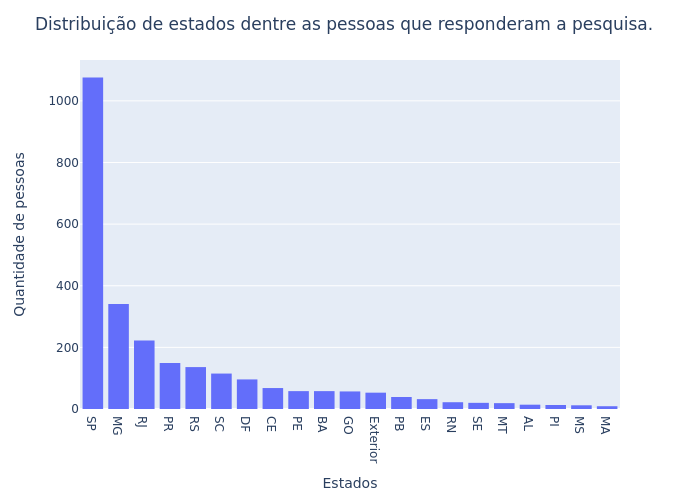

In [5]:
fig = px.histogram(df_1, x="('P1_e_a ', 'uf onde mora')").update_layout(
    title='Distribuição de estados dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Estados', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

**Gráfico que ilustra a distribuição do nível de ensino dentre as pessoas que responderam a pesquisa.**

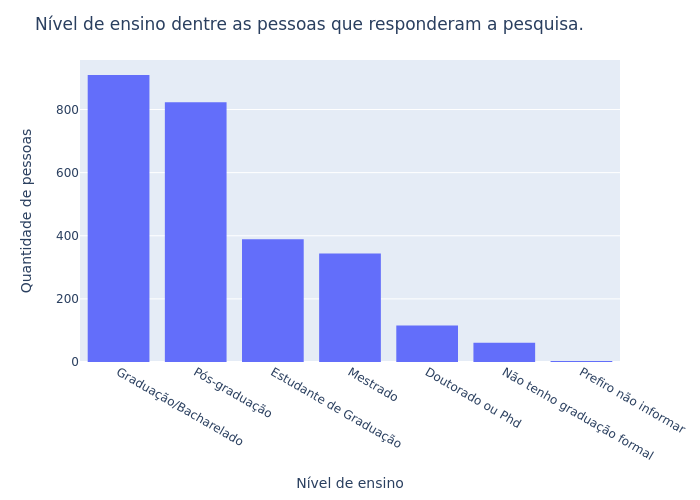

In [6]:
fig = px.histogram(df_1, x="('P1_h ', 'Nivel de Ensino')").update_layout(
    title='Nível de ensino dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Nível de ensino', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

**Gráfico que ilustra a área de formação dentre as pessoas que responderam a pesquisa.**

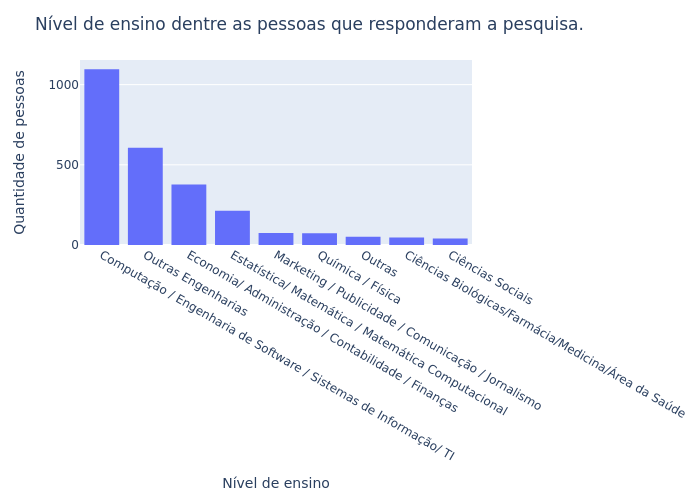

In [7]:
fig = px.histogram(df_1, x="('P1_i ', 'Área de Formação')").update_layout(
    title='Nível de ensino dentre as pessoas que responderam a pesquisa.', 
    xaxis_title='Nível de ensino', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

**Questão realizada com o intuito de entender melhor o motivo da concentração de profissionais na região Sudeste.**

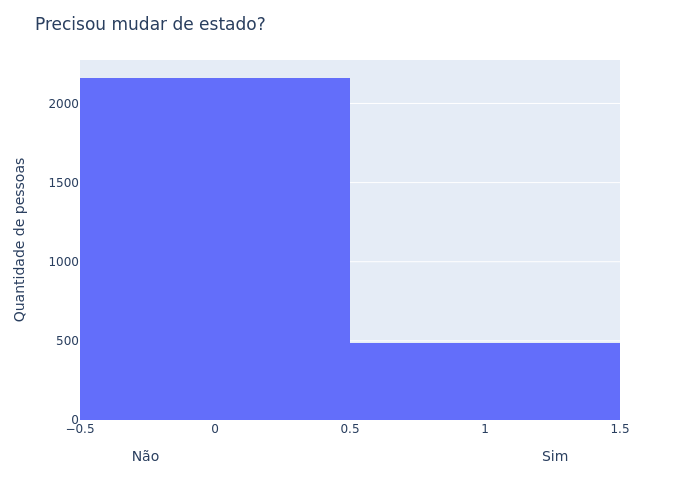

In [8]:
fig = px.histogram(df_1, x="('P1_g_c ', 'Mudou de Estado?')").update_layout(
    title='Precisou mudar de estado?', 
    xaxis_title='Não                                                                                      Sim', 
    yaxis_title='Quantidade de pessoas', 
    xaxis={'categoryorder':'total descending'}
)

fig.show("png")

# P2: Questões relaacionadas ao emprego atual

**Nuvem de palavras para entender quais são os principais motivos de insatisfação dos profissionais com o emprego atual.**

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anyelle/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


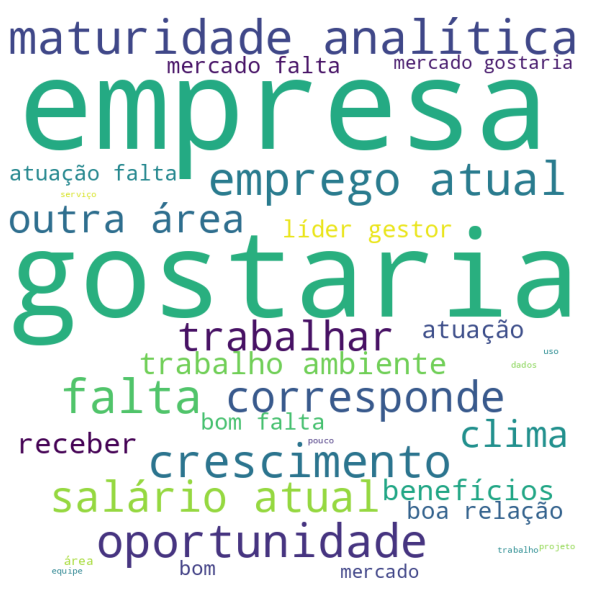

In [25]:
import nltk
from wordcloud import WordCloud

text = df_2["('P2_l ', 'Qual o principal motivo da sua insatisfação com a empresa atual?')"].unique()

val = str(text)
tokens = val.split()
for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
tokens = str(tokens)
tokens = tokens.replace("'", " ").replace("nan", ' ').replace(",", " ")


nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(tokens)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
data = {'Sim': [267,176,39,218,64,79,272],
        'Não': [345,436,573,394,548,533,340]}

data_reasons = pd.DataFrame(data, index=['Falta de oportunidade de crescimento no emprego atual',
                                         'Salário atual não corresponde ao mercado',
                                         'Não tenho uma boa relação com meu líder/gestor',
                                         'Gostaria de trabalhar em em outra área de atuação',
                                         'Gostaria de receber mais benefícios',
                                         'O clima de trabalho/ambiente não é bom',
                                         'Falta de maturidade analítica na empresa'])

data_reasons = data_reasons.reset_index()
data_reasons = data_reasons.rename(columns = {'index':'Categorias'})
data_reasons

,Categorias,Sim,Não
0,Falta de oportunidade de crescimento no empreg...,267,345
1,Salário atual não corresponde ao mercado,176,436
2,Não tenho uma boa relação com meu líder/gestor,39,573
3,Gostaria de trabalhar em em outra área de atuação,218,394
4,Gostaria de receber mais benefícios,64,548
5,O clima de trabalho/ambiente não é bom,79,533
6,Falta de maturidade analítica na empresa,272,340


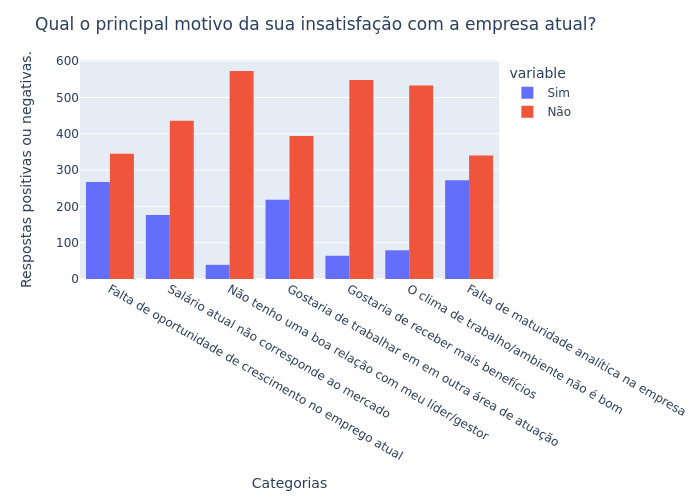

In [10]:
fig = px.histogram(
    data_frame = data_reasons,
    x = "Categorias",
    y = ["Sim","Não"],
    barmode = 'group').update_layout(
                        title='Qual o principal motivo da sua insatisfação com a empresa atual?', 
                        yaxis_title='Respostas positivas ou negativas.')

fig.show("png")

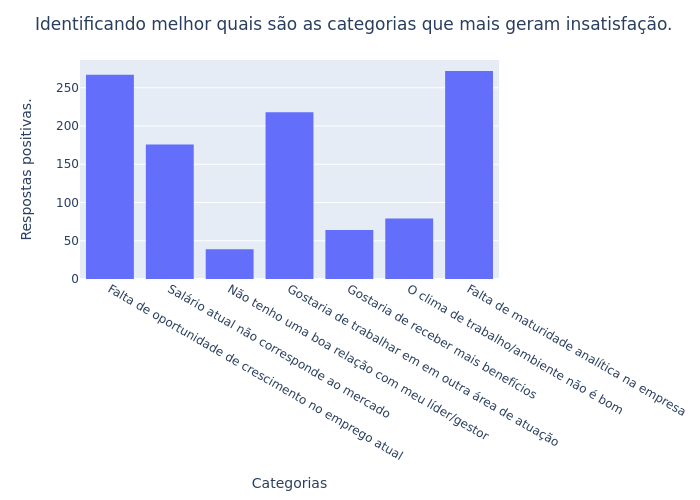

In [11]:
fig = px.histogram(data_reasons, x='Categorias', y='Sim').update_layout(
                        title='Identificando melhor quais são as categorias que mais geram insatisfação.', 
                        yaxis_title='Respostas positivas.')

fig.show("png")